In [1]:
import numpy as np
import pandas as pd
import os
from src.myscripts import func

In [2]:
import config
# Data folder
data_path = config.SOUNDS_DATA_DIR_PATH

C:\Users\Bcom_\Documents\Projekty\Rozpoznawanie_dzwiekow_gitarowych\data\prepared_data


#### 1- The first character denotes the type of string used in the recording:
- An 's' denotes a steel string.
- An 'n' denotes a nylon string.  
#### 2- The second character denotes the apparatus used to pluck the string:
- A 'p' denotes that the string was plucked with a pick (or plectrum).
- An 'f' denotes that the string was plucked with a finger or thumb.
- An 'n' denotes that the string was plucked with a nail.
#### 3- The third character denotes how the note was sounded:  
- An 'n' denotes the note was sounded normally and allowed to ring out.
- An 'l' denotes that the note was played louder than normal.
- An 'm' denotes that the note was muted early with the palm (usually one second after playing).

In [3]:
num_files = []
column_names = ["number_of_files", "path"]
notes_dataframe = pd.DataFrame(columns=column_names)

for root, dirs, files in os.walk(data_path):
    if root != data_path:
        notes_dataframe.loc[os.path.basename(root)] = [len(files), root]
        
print("Faktyczna liczab plikow z danymi:",notes_dataframe["number_of_files"].sum())
notes_dataframe  



Faktyczna liczab plikow z danymi: 1452


number_of_files  \
Guitar Dataset                0   
A2                           24   
A3                           36   
A4                           36   
Asharp2                      24   
Asharp3                      36   
Asharp4                      36   
B2                           24   
B3                           48   
B4                           36   
C3                           24   
C4                           48   
C5                           24   
Csharp3                      24   
Csharp4                      48   
Csharp5                      24   
D2                           24   
D3                           36   
D4                           36   
D5                           24   
Dsharp2                      24   
Dsharp3                      36   
Dsharp4                      36   
Dsharp5                      24   
E2                           36   
E3                           36   
E4                           48   
E5                           24   
F2                           36   
F3                           36   
F4                           48   
F5                           24   
Fsharp2                      36   
Fsharp3                      36   
Fsharp4                      42   
Fsharp5                      24   
G2                           36   
G3                           48   
G4                           36   
G5                           24   
Gsharp2                      36   
Gsharp3                      48   
Gsharp4                      42   
Gsharp5                      24   

                                                             path  
Guitar Dataset  C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
A2              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
A3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
A4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Asharp2         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Asharp3         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Asharp4         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
B2              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
B3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
B4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
C3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
C4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
C5              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Csharp3         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Csharp4         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Csharp5         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
D2              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
D3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
D4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
D5              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Dsharp2         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Dsharp3         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Dsharp4         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Dsharp5         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
E2              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
E3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
E4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
E5              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
F2              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
F3              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
F4              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
F5              C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Fsharp2         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Fsharp3         C:\Users\Bcom_\Documents\Projekty\Rozpoznawani...  
Fsharp4         C:\Users\Bcom_\Documents\Projekty\Rozpoznawa

### Wydzielenie cech

In [4]:
df=func.load_dataset(data_path)

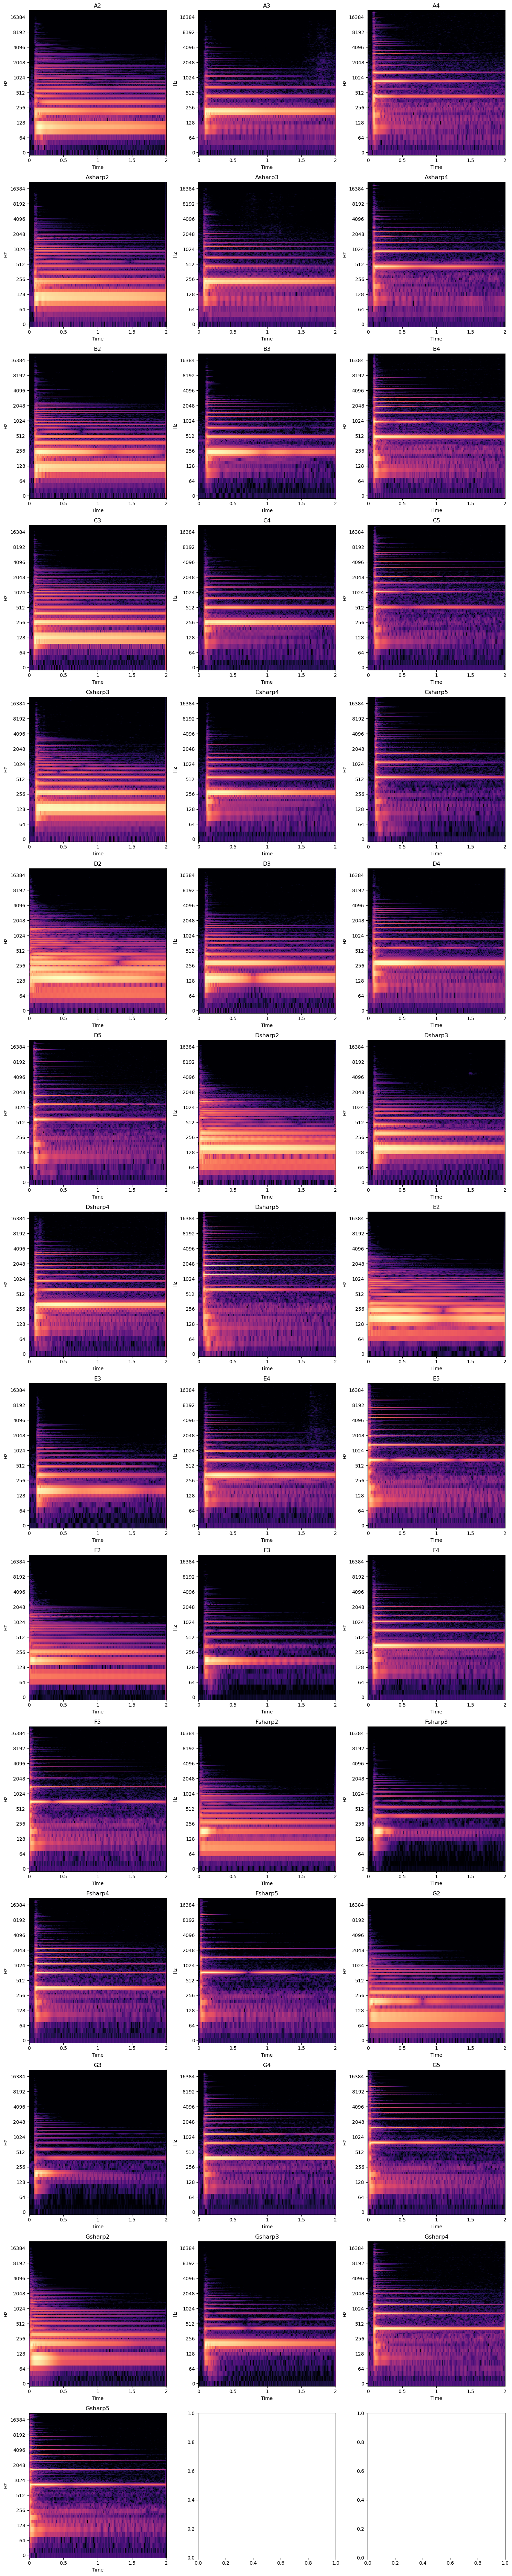

In [5]:
import librosa
from matplotlib import pyplot as plt
import math

examp = df[df["pluck_type_finger"] & df["string_type_steel"] & df["sound_type_normal"]].groupby("clazz").first().reset_index()

num_of_figure_cols = 3
num_rows = math.ceil(len(examp) / num_of_figure_cols)
fig, axes = plt.subplots(num_rows, num_of_figure_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).flatten()

for ax, (_, row) in zip(axes, examp.iterrows()):
    y = row["audio_file"]
    sr = row["sampling_rate"]
    clazz = row["clazz"]

    y_stft = librosa.stft(y)
    y_db = librosa.amplitude_to_db(abs(y_stft), ref=np.max)
    librosa.display.specshow(y_db, sr=sr, x_axis="time", y_axis="log", ax=ax)
    ax.set_title(clazz)

plt.tight_layout()
plt.show()



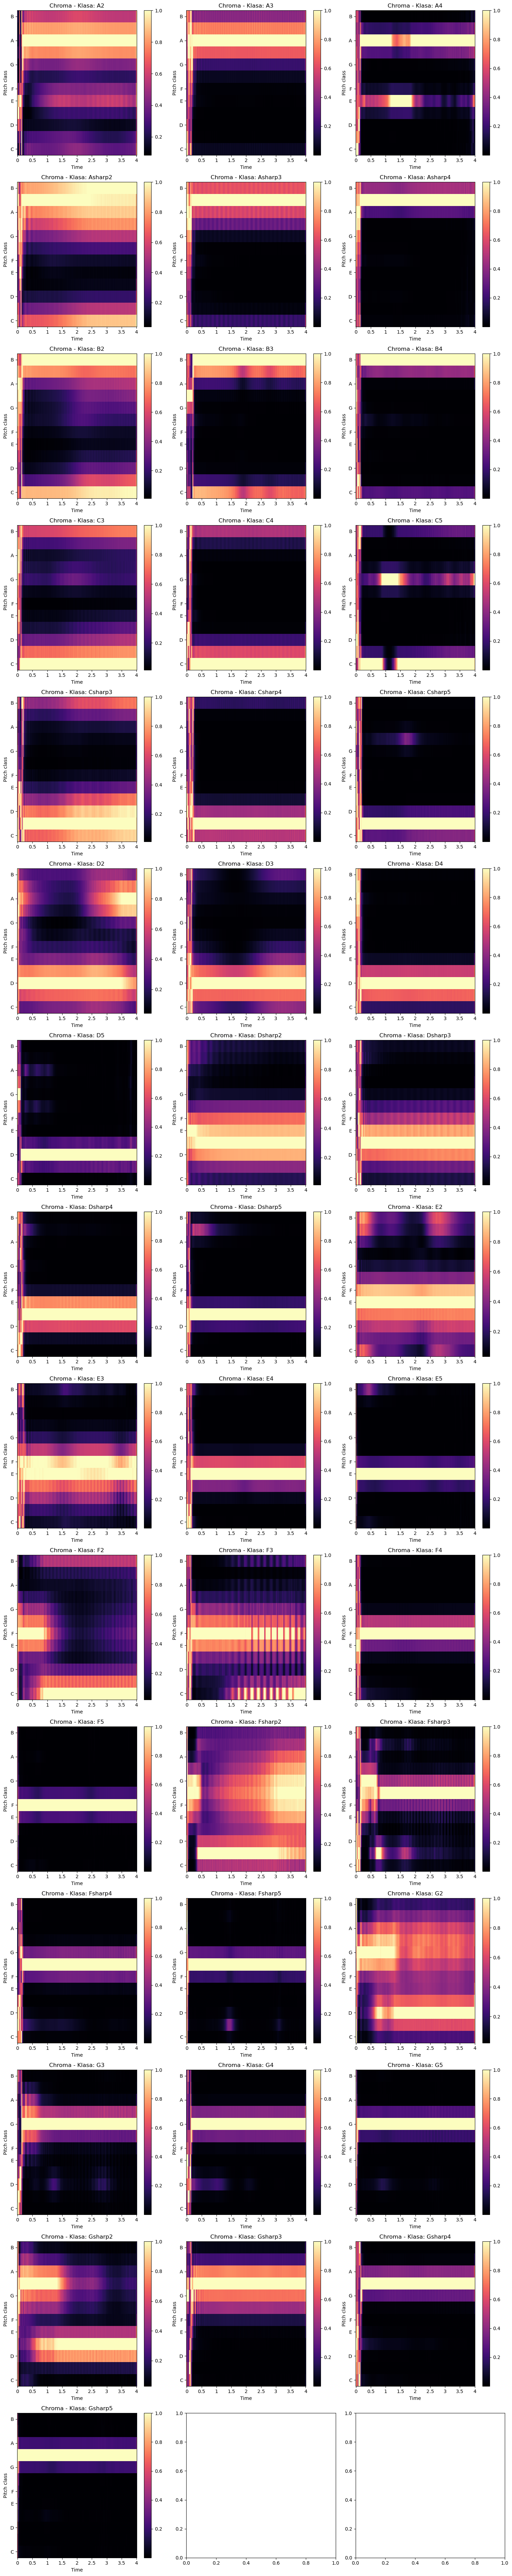

In [6]:
examp = df[df["pluck_type_finger"] & df["string_type_steel"] & df["sound_type_normal"]].groupby("clazz").first().reset_index()

num_of_figure_cols = 3
num_rows = math.ceil(len(examp) / num_of_figure_cols)
fig, axes = plt.subplots(num_rows, num_of_figure_cols, figsize=(15, 5 * num_rows))
axes = np.array(axes).flatten()


for ax, (_, row) in zip(axes, examp.iterrows()):
    y = row["audio_file"]
    sr = row["sampling_rate"]
    clazz = row["clazz"]
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)

    im = librosa.display.specshow(chroma, y_axis="chroma", x_axis="time", ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Chroma - Klasa: {clazz}")


plt.tight_layout()
plt.show()


In [7]:
examp = df[(df["clazz"] == "E4") & (df["string_type"] == "steel")].groupby("pluck_type").first().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = np.array(axes).flatten()

for ax, (_, row) in zip(axes, examp.iterrows()):
    y = row["audio_file"]
    sr = row["sampling_rate"]
    clazz = row["clazz"]
    pluck_type = row["pluck_type"]
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    im = librosa.display.specshow(contrast, x_axis='time', ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title(f"Spectral Contrast - {clazz}:{pluck_type}")



plt.tight_layout()
plt.show()


KeyError: 'string_type'

### Data Augmentation (TO-DO)

### Audio Features Extraction

In [8]:
n_fft = 2048
hop_lenght =512
sr= 22050
df = func.load_dataset(data_path, sr)
mel, chroma, contrast, labels = func.process_dataset(df, n_fft, hop_lenght)


mel = pd.DataFrame(np.array([row.flatten() for row in mel]))
chroma = pd.DataFrame(np.array([row.flatten() for row in chroma]))
contrast = pd.DataFrame(np.array([row.flatten() for row in contrast]))


In [9]:
mel.shape

(1451, 11136)

In [10]:
chroma.shape

(1451, 1044)

In [11]:
contrast.shape

(1451, 609)